# Dataset
train.csv: A full training dataset with the following attributes:

> id: unique id for a news article

> title: the title of a news article

> author: author of the news article

> text: the text of the article; could be incomplete

> label: a label that marks the article as potentially unreliable
1: unreliable
0: reliable


### Importing Dependencies
##### Numpy for arrays
##### Pandas for storing and managing data in dataframes
##### re for searching words in a text or paragraph
##### nltk as natural language.toolkit and corpus refering to text body
##### stopwords for removing irrelevant words in a paragraph vertex
##### stemmer for using the root word for a particular word
##### tfidf for converting texts into vectors
##### train test split for splitting data into train and test
##### accuracy score from sql.matrix 

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#importing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giwai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#return insignificant words contained in stopwords to be removed from dataset in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Preprocessing

In [5]:
#loading the dataset to a pandas dataframe into a structured table 
news_data = pd.read_csv('./data/train.csv')
print("The structure of the dataset is (row, column):" + str(news_data.shape))
print(news_data.info())

The structure of the dataset is (row, column):(20800, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


In [6]:
# print first 5 rows of data
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
# To obtain missing values in the dataset
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
# replacing null values with empty string
news_data = news_data.fillna('')

In [9]:
# using author and title as they are most relevant to this analysis
# merging author name and news title in a new column by concatenation for easy text classification
news_data['theme'] = news_data['author'] + ' ' + news_data['title']
print(news_data['theme'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: theme, Length: 20800, dtype: object


In [10]:
# separating the data & labels 
x = news_data.drop(columns = 'label', axis=1)
y = news_data['label']
print(x)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

## Word Stemming

Stemming is the process of retrieving the root/key word for various words.

Example: legal, illegal, legality, legislation. Here the root word is 'legal'.

In [11]:
#Creating a vector variable from the Porter Stemmer library used to obtain root words
word_stem = PorterStemmer()

In [12]:
#By defining an argument text with the stemming function
#By creating a stemming function and define a variable text, obtained from concatenating author + title, based on the argument that follows
def stemming(theme):
  stemmed_theme = re.sub('[^a-zA-Z]',' ', theme)
  stemmed_theme = stemmed_theme.lower()
  stemmed_theme = stemmed_theme.split()
  stemmed_theme = [word_stem.stem(word) for word in stemmed_theme if not word in stopwords.words('english')]
  stemmed_theme = ' '.join(stemmed_theme)
  return stemmed_theme

In [13]:
news_data['theme'] = news_data['theme'].apply(stemming)

In [14]:
print(news_data['theme'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: theme, Length: 20800, dtype: object


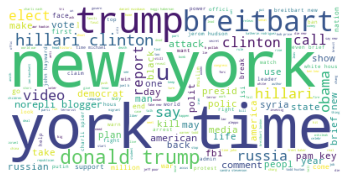

In [16]:
#WordCloud for news themes comprising of title and author to show the most frequent words
#The wordcloud library takes as input a string containing all the words you want to display.
#It passes it to the Wordcloud() function that will compute the display an show it on the screen thanks to the imshow() function
from wordcloud import WordCloud, STOPWORDS

text2 = ' '.join(news_data['theme'])
#wordcloud = WordCloud(width=500, height=500, background_color = "white").generate(text2)
wordcloud = WordCloud(background_color = "white").generate(text2)

#generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

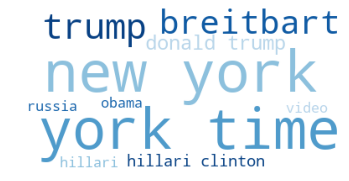

In [17]:
#WordCloud for news themes displaying only the top 10 words or 10 most common words to reduce the cloud clutter
#change color pallette with colormap and background color to white

stopwords = set(STOPWORDS)
stopwords.add("u")

text2 = ' '.join(news_data['theme'])
wordcloud = WordCloud(stopwords = stopwords, max_words= 10, background_color = "white", colormap = "Blues").generate(text2)
#generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#The displayed words now have some context related to the titles and authors of the adopted news articles

In [18]:
news_data.head()

,id,title,author,text,label,theme
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


In [19]:
# separating the data and label
x = news_data['theme'].values
y = news_data['label'].values

In [20]:
print(x)
x.shape

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


(20800,)

In [21]:
print(y)
y.shape

[1 0 1 ... 0 1 1]


(20800,)

In [22]:
# converting text data to numeric data
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)

In [23]:
print(x)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

#### Splitting Dataset into Training and Testing sets

In [24]:
#Using the train_test_split validation approach
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, stratify = y, random_state=2)

In [25]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((14560, 17128), (6240, 17128), (14560,), (6240,))

#### Fitting Logistic Regression Model

In [26]:
model = LogisticRegression()

In [48]:
model.fit(train_x, train_y)


LogisticRegression()

### Model Accuracy

In [29]:
#Evaluating the model
y_pred=model.predict(test_x)

#predict probabilities
prob_pred = model.predict_proba(test_x)
score_ = model.score(train_x, train_y)


### Accuracy Score on Training and Testing Data

In [30]:
# Accuracy Score on the Training Data
train_x_prediction = model.predict(train_x)
training_data_accuracy = accuracy_score(train_x_prediction, train_y)
print("The accuracy of training data is:", training_data_accuracy, "or")
print(f'Accuracy: {round(training_data_accuracy*100,2)}%')

The accuracy of training data is: 0.9850961538461539 or
Accuracy: 98.51%


In [31]:
# Accuracy Score on the Testing Data
test_x_prediction = model.predict(test_x)
testing_data_accuracy = accuracy_score(test_x_prediction, test_y)
print("The accuracy of testing data is:", testing_data_accuracy)
print(f'Accuracy: {round(testing_data_accuracy*100,2)}%')

The accuracy of testing data is: 0.9743589743589743
Accuracy: 97.44%


### Accuracy Score of Prediction

In [35]:
print('Accuracy (TP+TN/TP+TN+FP+FN) : {:.5f}'.format((float(tp)+tn)/(float(tp)+tn+fp+fn)))
print('Accuracy: {:.5f}'.format(accuracy_score(test_y, y_pred)))
#Overall error rate
print ('Overall error rate (1-Accuracy): {:.5f}'.format(1-accuracy_score(test_y,y_pred)))

Accuracy (TP+TN/TP+TN+FP+FN) : 0.97436
Accuracy: 0.97436
Overall error rate (1-Accuracy): 0.02564


### Confusion Matrix

In [36]:
CMX = confusion_matrix(test_y, y_pred, labels=[0, 1])
print(CMX)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
print("True negative {}".format(tn))
print("False positive {}".format(fp))
print("False negative {}".format(fn))
print("True positve {}".format(tp))

[[2979  137]
 [  23 3101]]
True negative 2979
False positive 137
False negative 23
True positve 3101


<AxesSubplot:>

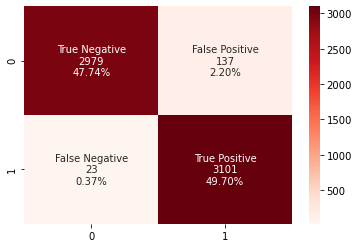

In [37]:
#Confusion Matrix Visualisation plot
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                CMX.flatten()]
group_percentages = ["{0:0.2%}".format(value) for value in
                     CMX.flatten()/np.sum(CMX)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CMX, annot=labels, fmt='', cmap='Reds')

### Sensitivity

In [38]:
#Sensitivity
sensitivity = float(tp)/(float(tp)+float(fn))
print ('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity))
#False positive rate
print ('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp)/(float(fp)+float(tn))))
print ('False positive rate (1-specificity): {:.5f}'.format(1-(float(tn)/(float(tn)+float(fp)))))

Sensitivy/recall (TP/TP+FN): 0.99264
False positive rate (FP/FP+TN): 0.04397
False positive rate (1-specificity): 0.04397


### Specificity

In [39]:
#Specificity
specificity = float(tn)/(float(tn)+float(fp))
print('Specificity (TN/TN+FP): {:.5f}'.format(specificity))
#False negative rate
print('False negative rate (FN/FN+TP): {:.5f}'.format(float(fn)/(float(fn)+tp)))
print('False negative rate (1-sensitivity): {:.5f}'.format(1-sensitivity))

Specificity (TN/TN+FP): 0.95603
False negative rate (FN/FN+TP): 0.00736
False negative rate (1-sensitivity): 0.00736


In [40]:
#Proportion of true positives
precision = float(tp)/(float(tp)+float(fp))
print('Proportion of true positives/precision (TP/TP+FP): {:5f}'.format(precision))
#Proportion of false positives
print('Proportion of false positives (FP/FP+TP): {:.5f}'.format(float(fp)/(float(fp)+float(tp))))
print('Proportion of false positives (1-PTP): {:.5f}'.format(1-float(tp)/(float(tp)+float(fp))))

Proportion of true positives/precision (TP/TP+FP): 0.957690
Proportion of false positives (FP/FP+TP): 0.04231
Proportion of false positives (1-PTP): 0.04231


In [41]:
#Proportion of true negatives
print('Proportion of true negatives (TN/TN+FN): {:.5f}'.format(float(tn)/(float(tn)+float(fn))))
#Proportion of false negatives
print('Proportion of false negatives (FN/FN+TN): {:.5f}'.format(float(fn)/(float(fn)+float(tn))))
print('Proportion of false negatives (1-PTN): {:.5f}'.format(1-float(tn)/(float(tn)+float(fn))))

Proportion of true negatives (TN/TN+FN): 0.99234
Proportion of false negatives (FN/FN+TN): 0.00766
Proportion of false negatives (1-PTN): 0.00766


### F1 score

In [42]:
#F1 score
print('F1 score (2*(Recall*Precision)/(Recall+Precision)): {}'.format(2*(sensitivity*precision)/(sensitivity+precision)))
F1_score = f1_score(test_y, y_pred, average=None)
print(F1_score)

F1 score (2*(Recall*Precision)/(Recall+Precision)): 0.9748506758880855
[0.97384766 0.97485068]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_y,model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3116
           1       0.96      0.99      0.97      3124

    accuracy                           0.97      6240
   macro avg       0.98      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



### ROC Curve

In [44]:
# ROC AUC Score
auc = roc_auc_score(test_y, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.974336


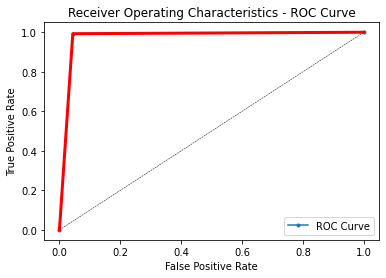

In [45]:
#Calculate ROC curve where fpr is False Positive Rate and tpr is True Positive Rate
fpr, tpr, _ = roc_curve(test_y, y_pred)
#Plot ROC curve
pyplot.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.plot([0,1],[0,1], linestyle="--",c='black',lw=.5)
plt.plot(fpr, tpr, c='red',lw=3)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver Operating Characteristics - ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Precison/ Recall curve

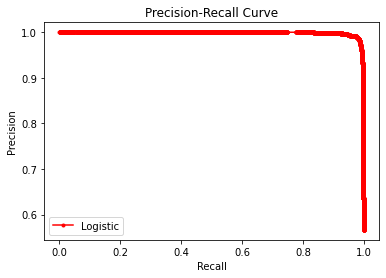

In [46]:
#predicting probabilities of model with tested data
prob_pred = model.predict_proba(test_x)
# keep probabilities for the positive outcome only
prob_pred = prob_pred[:, 1]
#calculating the precision and recall for each threshold
precision, recall, _ = precision_recall_curve(test_y, prob_pred)
#plot Recall and Precision Curve
pyplot.plot(recall, precision, marker='.', label='Logistic', c='red')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()